In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r"C:\Users\VALU\Downloads\archive\chest_xray\chest_xray\train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [3]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory(r"C:\Users\VALU\Downloads\archive\chest_xray\chest_xray\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\Users\VALU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 50)

Epoch 1/50


C:\Users\VALU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.7856 - loss: 0.4768 - val_accuracy: 0.8494 - val_loss: 0.3437
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 656ms/step - accuracy: 0.8965 - loss: 0.2499 - val_accuracy: 0.7532 - val_loss: 0.6270
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 697ms/step - accuracy: 0.9078 - loss: 0.2345 - val_accuracy: 0.8878 - val_loss: 0.2803
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 749ms/step - accuracy: 0.9281 - loss: 0.1866 - val_accuracy: 0.8397 - val_loss: 0.3548
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 698ms/step - accuracy: 0.9245 - loss: 0.1867 - val_accuracy: 0.8894 - val_loss: 0.3177
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 716ms/step - accuracy: 0.9379 - loss: 0.1714 - val_accuracy: 0.8990 - val_loss: 0.2738
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 718ms/step - accuracy: 0.9404 - loss: 0.1597 - val_accuracy: 0.8574 - val_loss: 0.4161
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 664ms/step - accuracy: 0.9487 - loss: 0.1392 

In [23]:
import tensorflow as tf

# Assuming `cnn` is your trained model instance
model_path = r"D:\xray\cnn_model.h5"
cnn.save(model_path)
print(f"Saved model to disk at {model_path}")


Saved model to disk at D:\xray\cnn_model.h5


In [24]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved model
model_path = r"D:\xray\cnn_model.h5"
cnn = load_model(model_path)

# Summarize the model architecture
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,299 (684.77 KB)

 Trainable params: 175,297 (684.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Load the saved model
model_path = r"D:\xray\cnn_model.h5"
cnn = load_model(model_path)

# Check if the model is compiled
try:
    cnn.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    print("Model compiled successfully.")
except AttributeError:
    print("Model is already compiled or compilation is not needed.")

# Assuming `training_set` and `testing_set` are defined
epochs_to_train = 10

# Continue training for additional epochs
history = cnn.fit(x=training_set, validation_data=testing_set, epochs=epochs_to_train)


Model compiled successfully.
Epoch 1/10


C:\Users\VALU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.7810 - loss: 0.4826 - val_accuracy: 0.8349 - val_loss: 0.3362
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 421ms/step - accuracy: 0.9033 - loss: 0.2400 - val_accuracy: 0.8622 - val_loss: 0.3324
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 441ms/step - accuracy: 0.9085 - loss: 0.2269 - val_accuracy: 0.8702 - val_loss: 0.3040
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 447ms/step - accuracy: 0.9105 - loss: 0.2146 - val_accuracy: 0.8718 - val_loss: 0.3273
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 446ms/step - accuracy: 0.9289 - loss: 0.1826 - val_accuracy: 0.7660 - val_loss: 0.5328
Epoch 6/10


In [22]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Load the saved model
model_path = r"D:\xray\cnn_model.h5"
cnn = load_model(model_path)

# Check if the model is compiled
try:
    cnn.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    print("Model compiled successfully.")
except AttributeError:
    print("Model is already compiled or compilation is not needed.")

# Assuming `training_set` and `testing_set` are defined
epochs_to_train = 5

# Continue training for additional epochs
history = cnn.fit(x=training_set, validation_data=testing_set, epochs=epochs_to_train)


Model compiled successfully.
Epoch 1/5


C:\Users\VALU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.7640 - loss: 0.5489 - val_accuracy: 0.8542 - val_loss: 0.3449
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 149s 877ms/step - accuracy: 0.9001 - loss: 0.2472 - val_accuracy: 0.8654 - val_loss: 0.3194
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 680ms/step - accuracy: 0.9154 - loss: 0.2090 - val_accuracy: 0.8718 - val_loss: 0.3056
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 684ms/step - accuracy: 0.9180 - loss: 0.2093 - val_accuracy: 0.8125 - val_loss: 0.5235
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 683ms/step - accuracy: 0.9223 - loss: 0.1868 - val_accuracy: 0.8846 - val_loss: 0.3299


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory(
    r"C:\Users\VALU\Downloads\archive\chest_xray\chest_xray\test",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 624 images belonging to 2 classes.


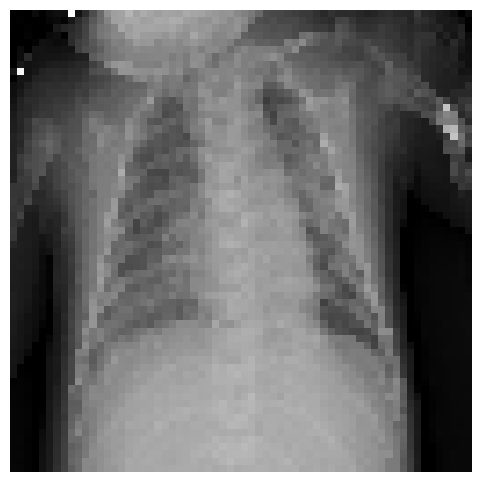

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Prediction: PNEUMONIA, Confidence: 0.95


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.models import load_model

# Load the saved model
model_path = r"D:\xray\cnn_model.h5"
cnn = load_model(model_path)

# Function to predict if the given image is NORMAL or PNEUMONIA
def predict_image(img_path, model, target_size=(64, 64)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the shape (1, 64, 64, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image
    img_array /= 255.0
    
    # Predict the class
    prediction = model.predict(img_array)
    
    # Interpret the prediction
    if prediction[0][0] >= 0.5:
        return "PNEUMONIA", prediction[0][0]
    else:
        return "NORMAL", prediction[0][0]

# Example usage
img_path = r"C:\Users\VALU\Downloads\archive\chest_xray\val\PNEUMONIA\person1946_bacteria_4875.jpeg"
prediction, confidence = predict_image(img_path, cnn)
print(f"Prediction: {prediction}, Confidence: {confidence:.2f}")


In [27]:
# Function to predict if the given image is NORMAL or PNEUMONIA
def predict_image(img_path, model, target_size=(64, 64)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the shape (1, 64, 64, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image
    img_array /= 255.0
    
    # Predict the class and probability
    prediction = model.predict(img_array)
    predicted_class = "PNEUMONIA" if prediction[0][0] >= 0.5 else "NORMAL"
    
    # Print the predicted class and probability
    print(f"Predicted Class: {predicted_class}")
    print(f"Probability: {prediction[0][0]:.4f}")
    
    return predicted_class, prediction[0][0]


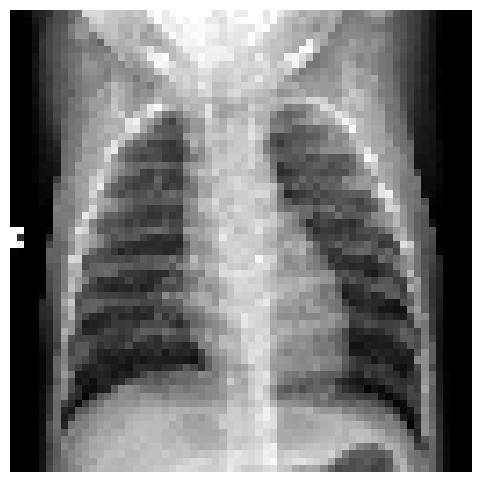

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: NORMAL
Probability: 0.0103
Prediction for Image 1: NORMAL, Confidence: 0.01


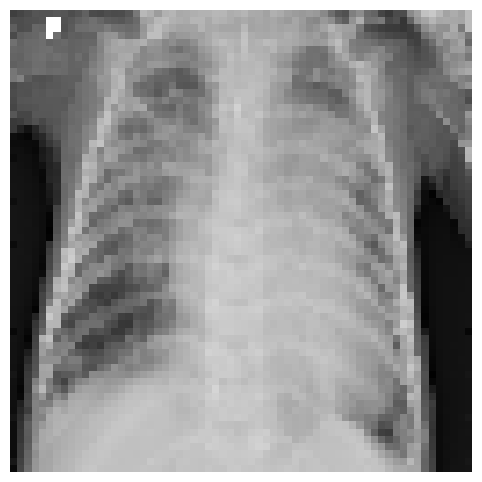

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: PNEUMONIA
Probability: 0.9996
Prediction for Image 2: PNEUMONIA, Confidence: 1.00


In [28]:
# Example usage
img_path1 = r"C:\Users\VALU\Downloads\archive\chest_xray\test\NORMAL\NORMAL2-IM-0346-0001.jpeg"
img_path2 = r"C:\Users\VALU\Downloads\archive\chest_xray\test\PNEUMONIA\person91_bacteria_446.jpeg"

# Predict the first image
prediction1, confidence1 = predict_image(img_path1, cnn)
print(f"Prediction for Image 1: {prediction1}, Confidence: {confidence1:.2f}")

# Predict the second image
prediction2, confidence2 = predict_image(img_path2, cnn)
print(f"Prediction for Image 2: {prediction2}, Confidence: {confidence2:.2f}")


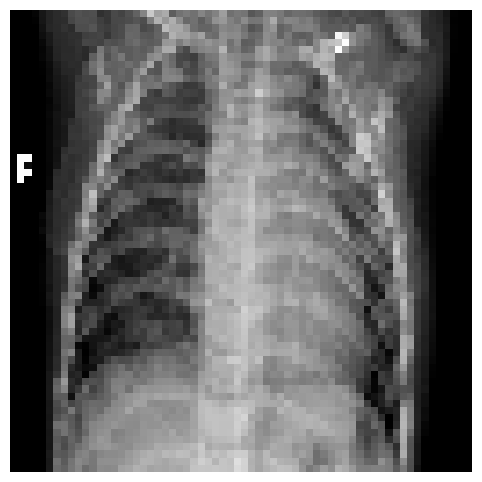

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: NORMAL
Probability: 0.5288
Prediction: NORMAL, Confidence: 0.53


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to predict if the given image is NORMAL or PNEUMONIA with adjustable threshold
def predict_image(img_path, model, threshold=0.5, target_size=(64, 64)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the shape (1, 64, 64, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image
    img_array /= 255.0
    
    # Predict the class and probability
    prediction = model.predict(img_array)
    predicted_class = "PNEUMONIA" if prediction[0][0] >= threshold else "NORMAL"
    
    # Print the predicted class and probability
    print(f"Predicted Class: {predicted_class}")
    print(f"Probability: {prediction[0][0]:.4f}")
    
    return predicted_class, prediction[0][0]

# Example usage with adjusted threshold
img_path = r"C:\Users\VALU\Downloads\archive\chest_xray\test\NORMAL\NORMAL2-IM-0338-0001.jpeg"
prediction, confidence = predict_image(img_path, cnn, threshold=0.7)
print(f"Prediction: {prediction}, Confidence: {confidence:.2f}")

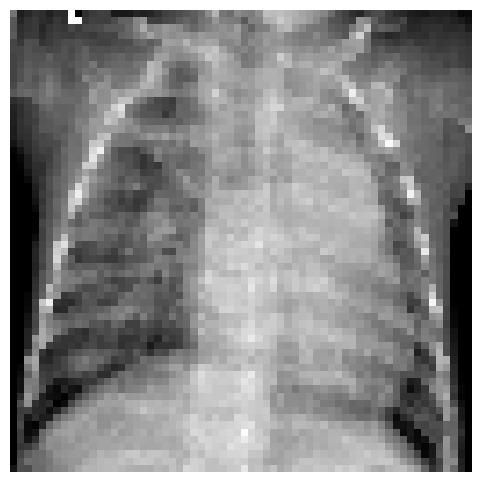

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: PNEUMONIA
Probability: 0.9670
Prediction: PNEUMONIA, Confidence: 0.97


In [37]:
img_path = r"C:\Users\VALU\Downloads\archive\chest_xray\test\PNEUMONIA\person83_bacteria_414.jpeg"
prediction, confidence = predict_image(img_path, cnn, threshold=0.7)
print(f"Prediction: {prediction}, Confidence: {confidence:.2f}")